# Страховой скоринг

Требуется провести классификацию клиентов по уровню благонадежности для страхования жизни. Всего 8 градаций.

https://www.kaggle.com/competitions/prudential-life-insurance-assessment/data

## Подключение библиотек

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rcParams
from core.plots import data_correlation_plot

In [2]:
rcParams["figure.figsize"] = 16, 8

## Загрузка данных

In [3]:
train = pd.read_csv("../data/prudential/train.csv.gz")
print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
None
   Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  

1. **Product_Info** - вид страховки
2. **Ins_Age** - возраст
3. **Ht** - рост
4. **Wt** - вес
5. **BMI** - индекс массы тела
6. **Employment_Info** - данные о работе
7. **InsuredInfo** - данные страховки
8. **Insurance_Hisory** - история страхования
9. **Family_Hist** - семья
10. **Medical_Histore** - медицинские данные
11. **Medical_Keyword** - медицинские термины

## Распределение значений

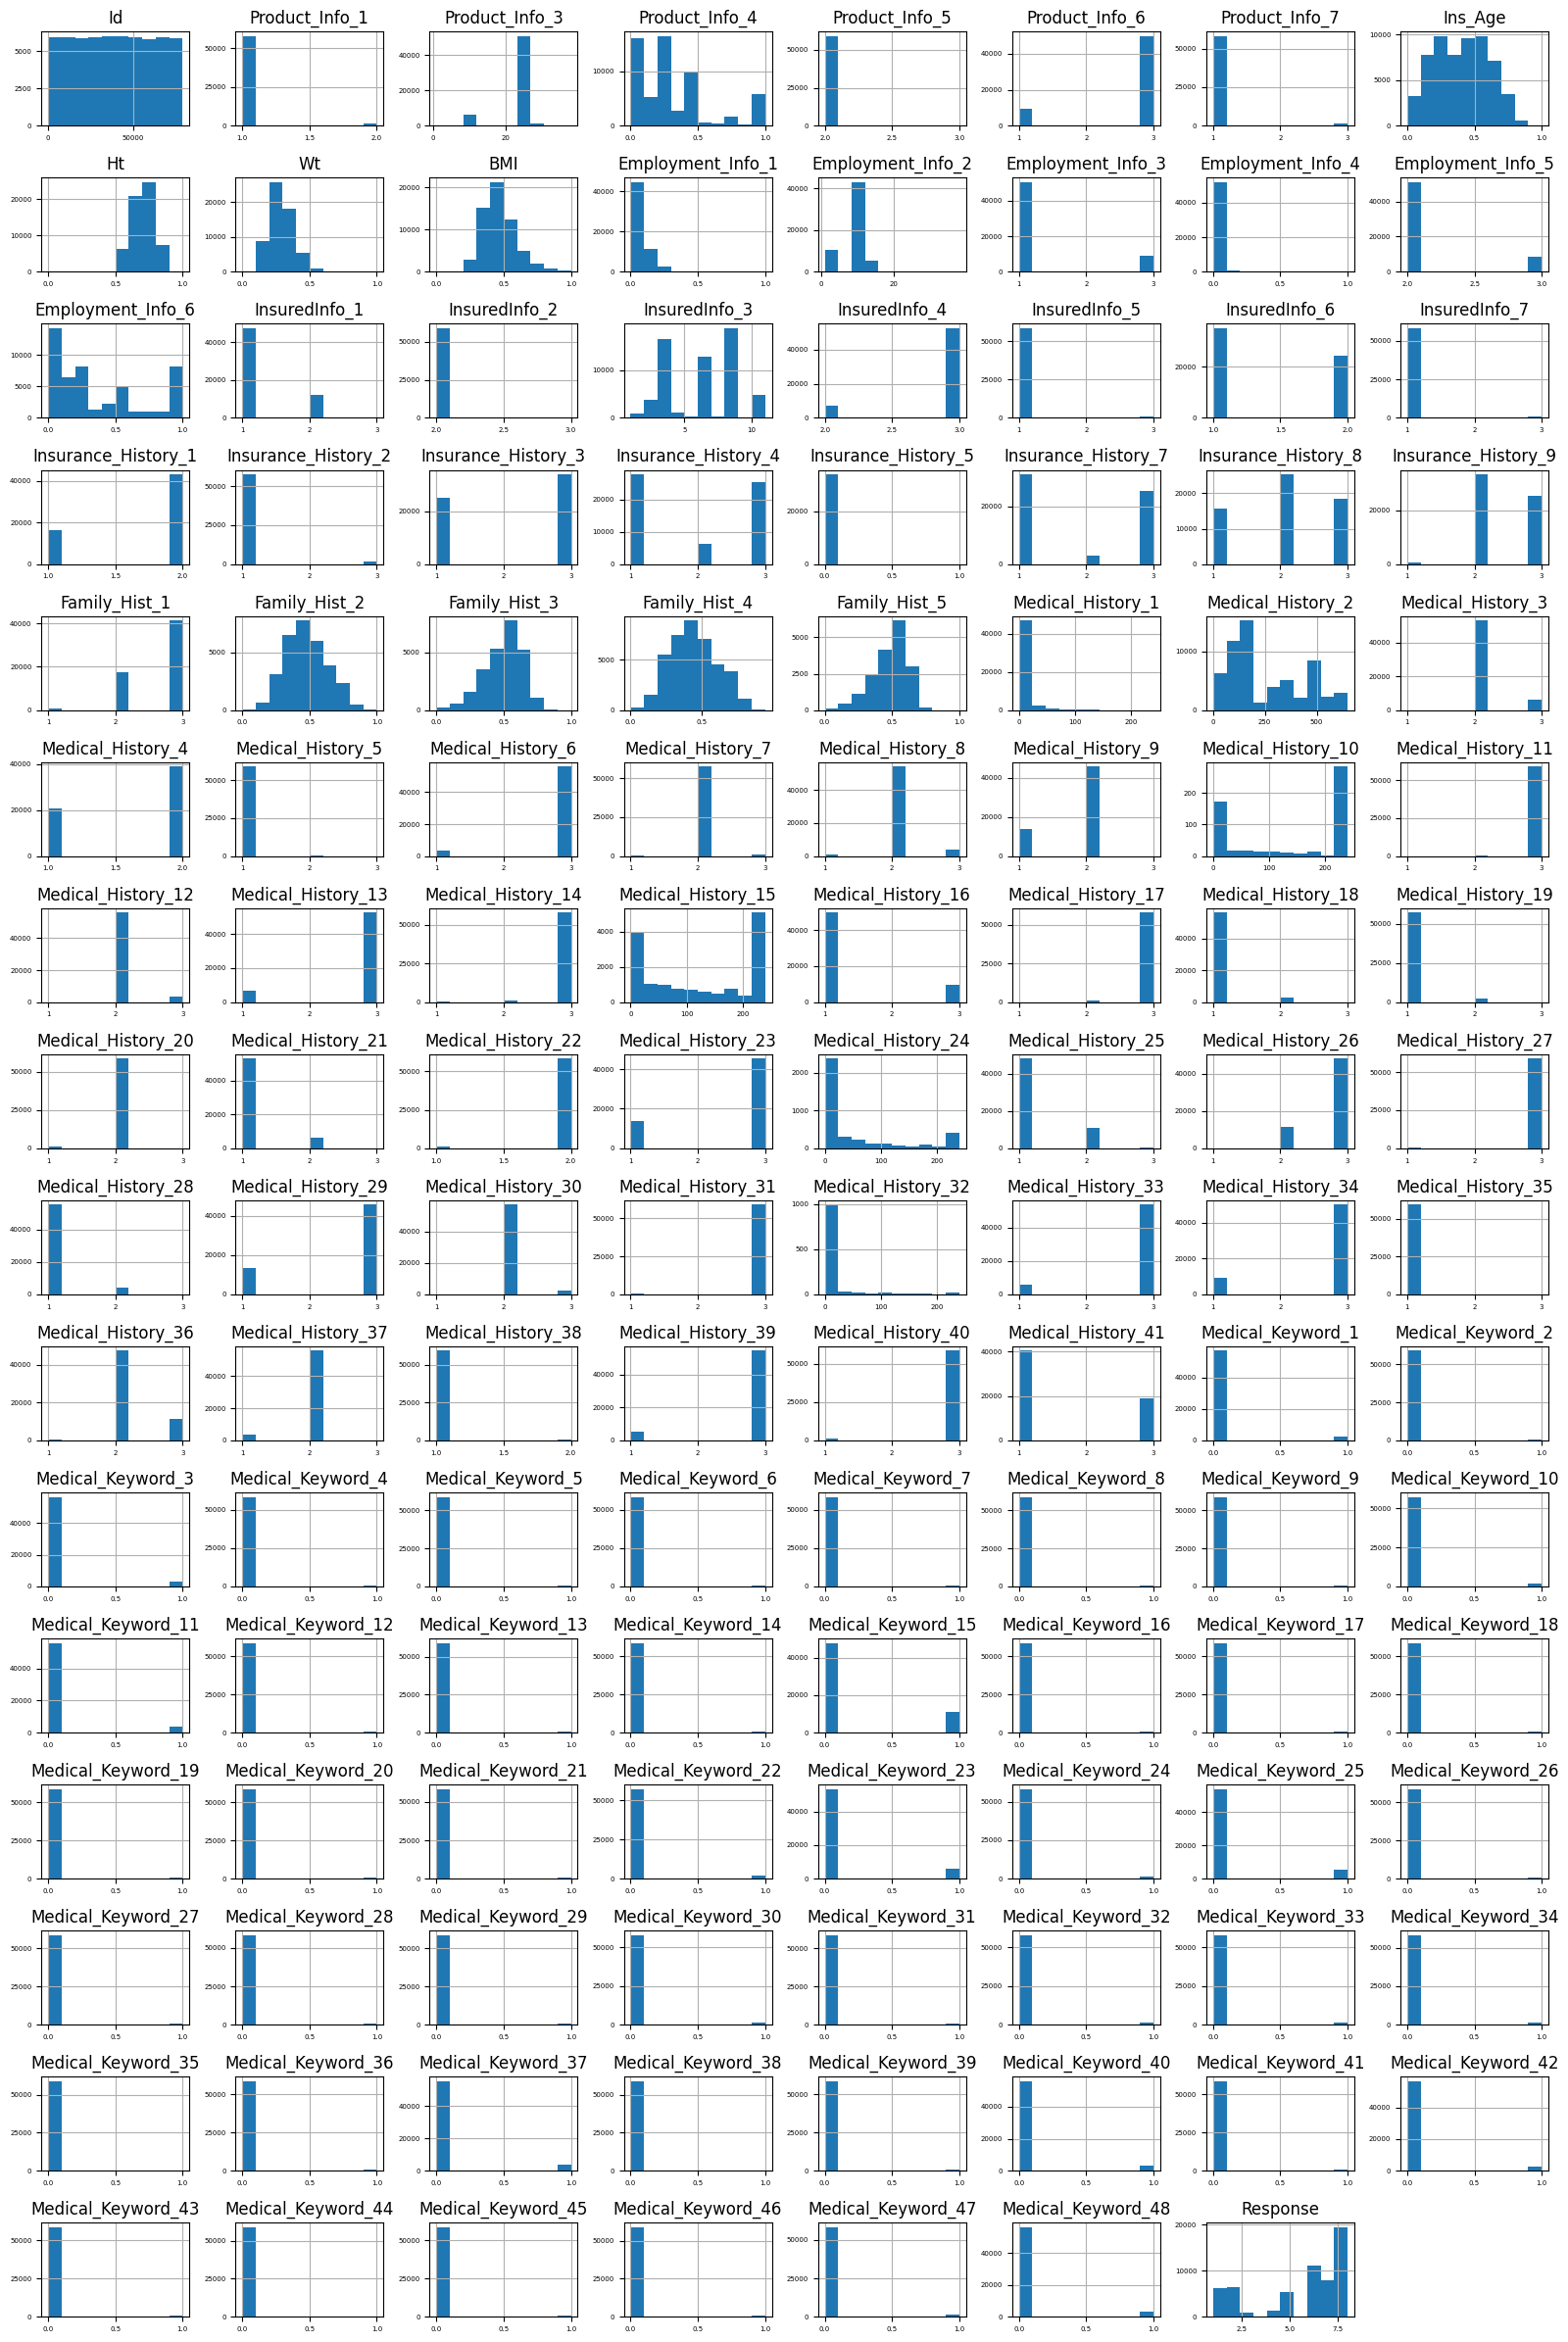

In [4]:
train.hist(figsize=(16, 24), layout=(16, 8), ylabelsize=5, xlabelsize=5)
plt.tight_layout()
plt.show()

## Зависимость скоринга от параметров

1. история страхования

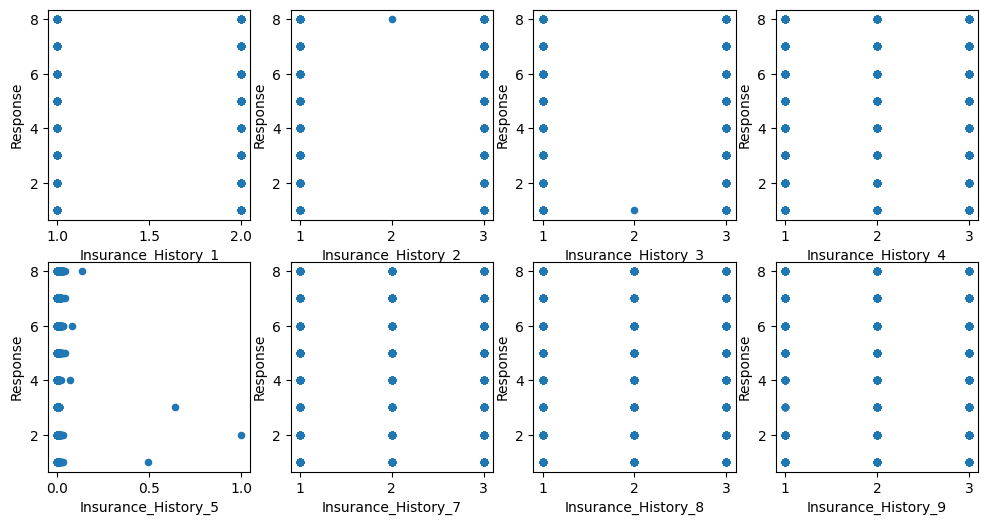

In [5]:
data_correlation_plot(train, train.columns[train.columns.str.startswith("Insurance_History")], "Response")

2. параметры страхования

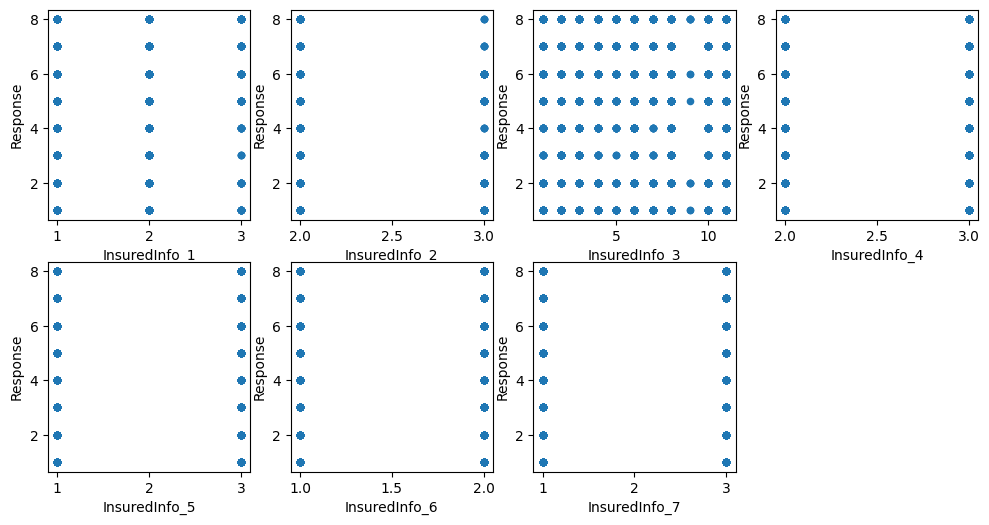

In [7]:
data_correlation_plot(train, train.columns[train.columns.str.startswith("InsuredInfo")], "Response")

3. физиология

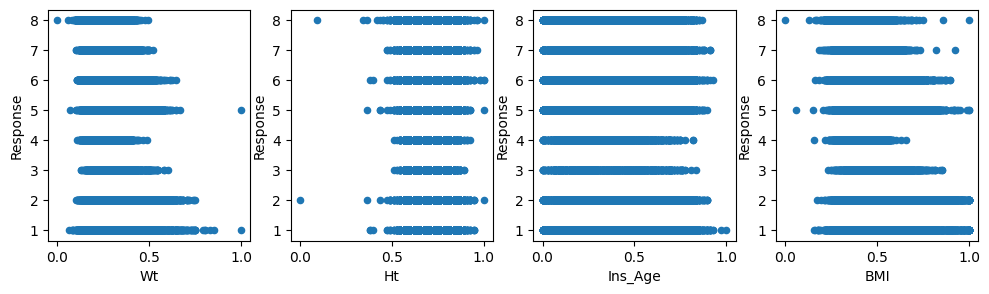

In [8]:
data_correlation_plot(train, ["Wt", "Ht", "Ins_Age", "BMI"], "Response")

4. семья

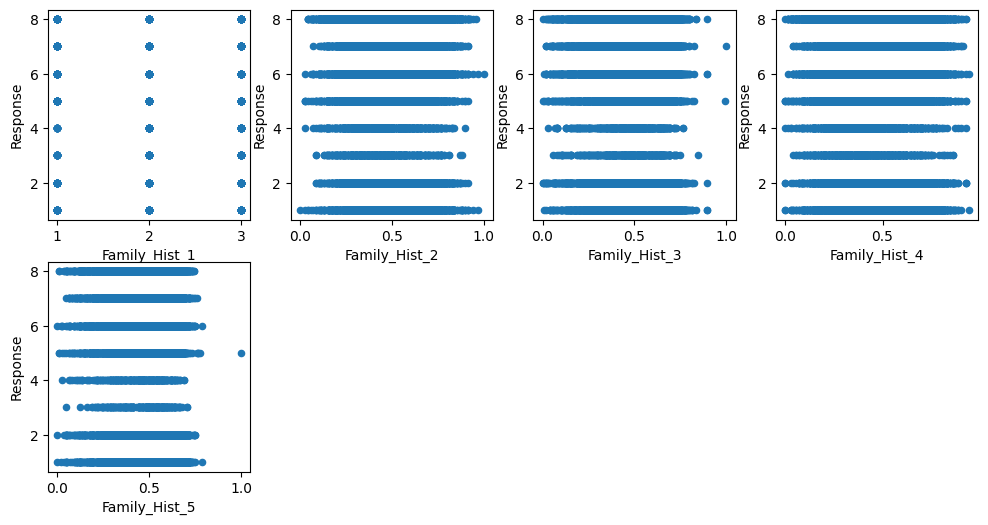

In [9]:
data_correlation_plot(train, train.columns[train.columns.str.startswith("Family_Hist")], "Response")